In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv(r"E:\2022-2023 hk1\PTTK\CK\code\1-12-2017 1-12-2022\MSN Historical Data.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,68500.0,67000.0,69400.0,66500.0,725370.0,0.02
1,12/4/2017,69000.0,70000.0,70000.0,68800.0,1190000.0,0.01
2,12/5/2017,68900.0,69000.0,70100.0,68600.0,777070.0,0.00
3,12/6/2017,67700.0,68900.0,69000.0,66000.0,1080000.0,-0.02
4,12/7/2017,69000.0,68600.0,69800.0,67300.0,1560000.0,0.02
...,...,...,...,...,...,...,...
1244,11/25/2022,94000.0,90000.0,94500.0,90000.0,923100.0,0.06
1245,11/28/2022,97200.0,94000.0,97200.0,93500.0,2130000.0,0.03
1246,11/29/2022,99000.0,97200.0,99000.0,95500.0,2170000.0,0.02
1247,11/30/2022,102000.0,99500.0,102000.0,92900.0,1500000.0,0.03


In [3]:
df['Date']=pd.to_datetime(df.Date,format='%m/%d/%Y')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

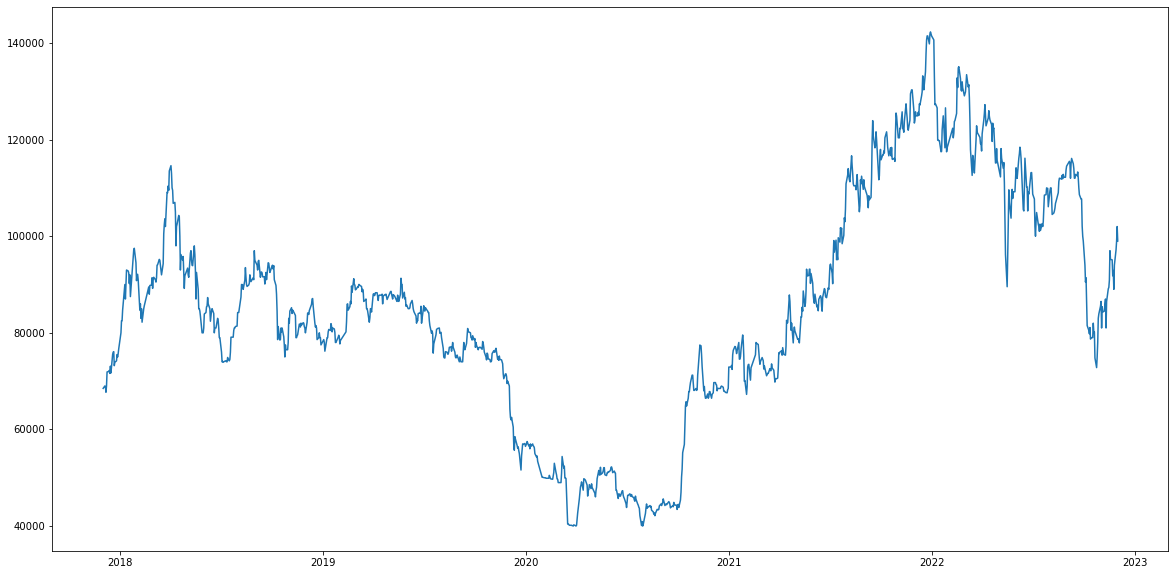

In [4]:
# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(20,10))
plt.plot(df['Price'])
plt.show()

In [5]:
# Set the index of the DataFrame to the 'date' column
df.index = df.Date
# Create a new DataFrame containing only the 'date' and 'price' columns
df = pd.DataFrame(df, columns=['Price'])



In [6]:
import math
data = df.values
t = math.ceil(len(df)* 0.8)
train_data = data[:t]
test_data = data[t:]

In [7]:
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(data)
sc_train

array([[0.27865166],
       [0.28353977],
       [0.28256215],
       ...,
       [0.57682644],
       [0.60615511],
       [0.57682644]])

In [8]:
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(sc_train[i-60:i, 0])
    y_train.append(sc_train[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

print('x_train shape == {}.'.format(x_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

x_train shape == (940, 60, 1).
y_train shape == (940, 1).


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
import tensorflow as tf

learning_rate = 0.0001
hidden_unit = 64
batch_size = 32
epoch = 100
model = Sequential()
model.add(LSTM(units=hidden_unit, return_sequences=True, input_shape =(x_train.shape[1],1), activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=hidden_unit, return_sequences=True,activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=hidden_unit, return_sequences=False,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss='mean_squared_error')
pred = model.fit(x_train, y_train ,batch_size=batch_size, epochs=epoch)

Epoch 1/100
30/30 [==============================] - 7s 51ms/step - loss: 0.1576
Epoch 2/100
30/30 [==============================] - 1s 50ms/step - loss: 0.1066
Epoch 3/100
30/30 [==============================] - 2s 54ms/step - loss: 0.0252
Epoch 4/100
30/30 [==============================] - 2s 50ms/step - loss: 0.0095
Epoch 5/100
30/30 [==============================] - 2s 49ms/step - loss: 0.0078
Epoch 6/100
30/30 [==============================] - 2s 55ms/step - loss: 0.0063
Epoch 7/100
30/30 [==============================] - 2s 52ms/step - loss: 0.0063
Epoch 8/100
30/30 [==============================] - 2s 51ms/step - loss: 0.0054
Epoch 9/100
30/30 [==============================] - 2s 54ms/step - loss: 0.0055
Epoch 10/100
30/30 [==============================] - 2s 58ms/step - loss: 0.0054
Epoch 11/100
30/30 [==============================] - 2s 51ms/step - loss: 0.0054
Epoch 12/100
30/30 [==============================] - 2s 53ms/step - loss: 0.0052
Epoch 13/100
30/30 [=====

In [10]:
y_train = sc.inverse_transform(y_train)

y_train_predict = model.predict(x_train)

y_train_predict = sc.inverse_transform(y_train_predict)

30/30 [==============================] - 1s 18ms/step


In [11]:
test = df[len(train_data)-60:].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

x_test = []
for i in range(60, test.shape[0]):
    x_test.append(sc_test[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_test = data[t:]

print('x_test shape == {}.'.format(x_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

x_test shape == (249, 60, 1).
y_test shape == (249, 1).


In [12]:
y_test_predict = model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

8/8 [==============================] - 0s 13ms/step


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(y_test, y_test_predict)
mape = mean_absolute_percentage_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 5604.62
MAPE: 5.13%
MSE: 45950991.40
RMSE: 6778.72
R2: 0.81


C:\Users\PC\AppData\Local\Temp\ipykernel_24744\2552966144.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['pred'] = y_train_predict
C:\Users\PC\AppData\Local\Temp\ipykernel_24744\2552966144.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['pred'] = y_test_predict


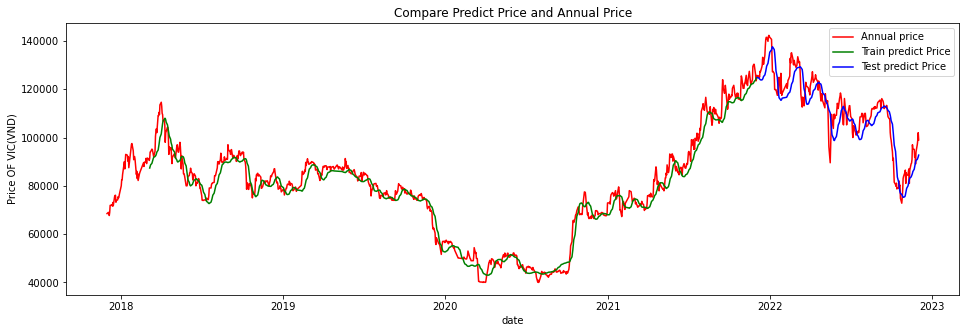

In [14]:
# Create DataFrames for the training and test data
train_data1 = df[60:t]
test_data1 = df[t:]

# Create a plot to compare the predicted and true values for the training and test data
plt.figure(figsize=(16,5))
plt.plot(df, label='Annual price', color='r')
train_data1['pred'] = y_train_predict
plt.plot(train_data1['pred'], label='Train predict Price', color='g')
test_data1['pred'] = y_test_predict
plt.plot(test_data1['pred'], label='Test predict Price', color='b')
plt.title('Compare Predict Price and Annual Price')
plt.xlabel('date')
plt.ylabel('Price OF VIC(VND)')
plt.legend()
plt.show()

In [15]:
predictions_future = model.predict(x_test[-30:])

1/1 [==============================] - 0s 27ms/step


In [16]:
predictions_future

array([[0.36044064],
       [0.35616753],
       [0.35197645],
       [0.34794655],
       [0.34495884],
       [0.34457618],
       [0.3472933 ],
       [0.35319823],
       [0.36195746],
       [0.3712782 ],
       [0.38114506],
       [0.39086163],
       [0.39994934],
       [0.40844068],
       [0.41646275],
       [0.42228574],
       [0.42687342],
       [0.43132266],
       [0.43608317],
       [0.44160026],
       [0.44908243],
       [0.45827106],
       [0.46860546],
       [0.47847533],
       [0.48730722],
       [0.49359015],
       [0.49834678],
       [0.5029477 ],
       [0.5083498 ],
       [0.51532656]], dtype=float32)

In [17]:
predict = sc.inverse_transform(predictions_future)
predict

array([[76866.11 ],
       [76429.016],
       [76000.32 ],
       [75588.1  ],
       [75282.5  ],
       [75243.35 ],
       [75521.28 ],
       [76125.3  ],
       [77021.266],
       [77974.67 ],
       [78983.945],
       [79977.84 ],
       [80907.414],
       [81775.984],
       [82596.555],
       [83192.19 ],
       [83661.45 ],
       [84116.56 ],
       [84603.51 ],
       [85167.85 ],
       [85933.195],
       [86873.086],
       [87930.19 ],
       [88939.766],
       [89843.164],
       [90485.84 ],
       [90972.39 ],
       [91443.016],
       [91995.59 ],
       [92709.24 ]], dtype=float32)

In [18]:
predict.shape

(30, 1)

In [19]:
datelist_future = pd.date_range(start="12/2/2022",end="12/31/2022")

In [20]:
new_date=df.index.append(datelist_future)
new_date

DatetimeIndex(['2017-12-01', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08', '2017-12-11', '2017-12-12',
               '2017-12-13', '2017-12-14',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=1279, freq=None)

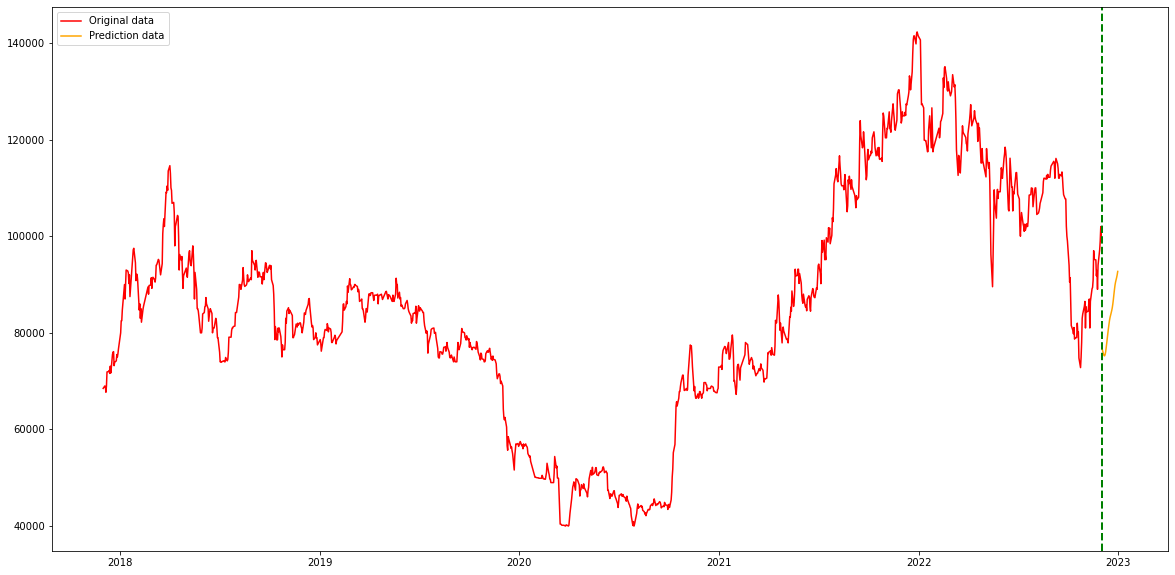

In [21]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(df.index, df['Price'], 'red', label="Original data")
plt.plot(datelist_future, predict, 'orange', label="Prediction data")
plt.axvline(x = min(datelist_future), color='green', linewidth=2, linestyle='--')
plt.legend(loc='upper left')
plt.show()